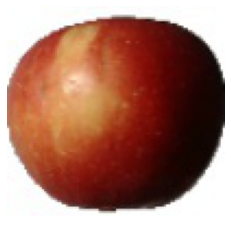

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob

train_path = "fruits-360/Training/"
test_path = "fruits-360/Test/"
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.axis("off")
plt.imshow(img)

In [2]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [3]:
className = glob(train_path + "/*")
numberOfClass = len(className)
print("Number of Class: ", numberOfClass)

Number of Class:  131


In [4]:
##CNN Model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(34, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation("softmax"))

In [5]:
model.compile(loss="categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])
batch_size = 32

In [6]:
## Data Generation -Train -Test
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip = True,
                  zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")

test_generator = train_datagen.flow_from_directory(test_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [7]:
hist = model.fit_generator(generator = train_generator,
                   steps_per_epoch = 1600 // batch_size,
                   epochs = 100,
                   validation_data = test_generator,
                   validation_steps = 800 // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
50/50 [==============================] - 137s 3s/step - loss: 4.6287 - accuracy: 0.0350 - val_loss: 4.0177 - val_accuracy: 0.1037
Epoch 2/100
50/50 [==============================] - 136s 3s/step - loss: 3.6655 - accuracy: 0.1069 - val_loss: 3.0456 - val_accuracy: 0.1963
Epoch 3/100
50/50 [==============================] - 135s 3s/step - loss: 2.9420 - accuracy: 0.2356 - val_loss: 2.5940 - val_accuracy: 0.2188
Epoch 4/100
50/50 [==============================] - 115s 2s/step - loss: 2.4238 - accuracy: 0.3113 - val_loss: 2.1303 - val_accuracy: 0.3738
Epoch 5/100
50/50 [==============================] - 106s 2s/step - loss: 1.9778 - accuracy: 0.4112 - val_loss: 1.6246 - val_accuracy: 0.5213
Epoch 6/100
50/50 [==============================] - 108s 2s/step - loss: 1.7561 - accuracy: 0.4669 - val_loss: 1.3094 - val_accuracy: 0.6187
Epoch 7/100
50/50 [==============================] - 114s 2s/step - loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


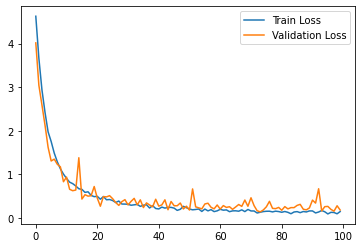

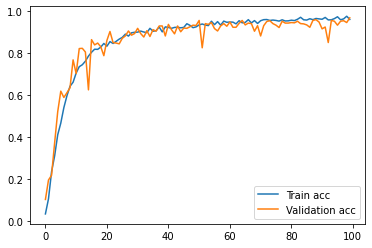

In [8]:
## Model save
model.save_weights("deneme.h5")

## Model evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [9]:
## Save history
import json
with open("deneme.json", "w") as f:
    json.dump(hist.history, f)

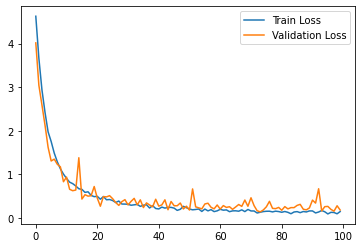

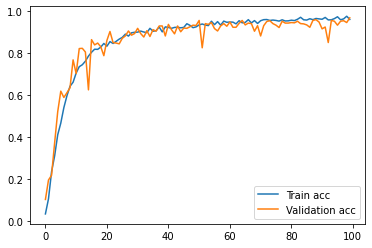

In [10]:
import codecs
with codecs.open("deneme.json", "r", encoding = "utf-8") as f:
    h = json.loads(f.read())

plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label = "Train acc")
plt.plot(h["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()